<a href="https://www.kaggle.com/code/owaiskhan9654/training-of-eeg-schizophrenia-disorder-using-cnn?scriptVersionId=123622104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **<span style="color:#e76f51;">Training of EEG Signals For Schizophrenia Disorder using CNN</span>**

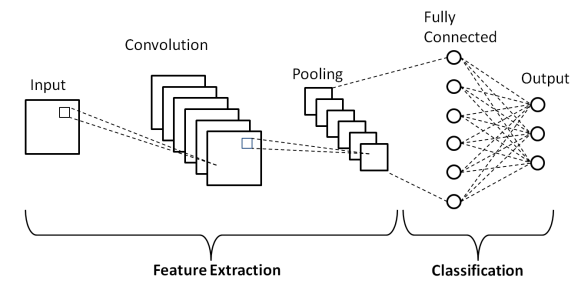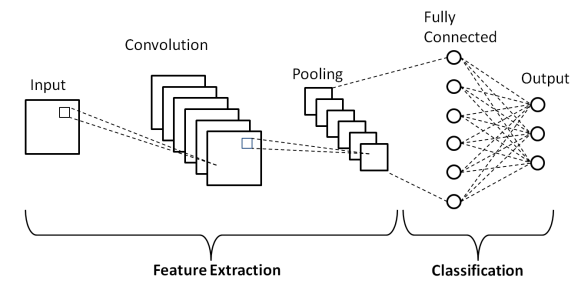


# **<span style="color:#e76f51;">Goal</span>**
The goal of this Notebook is to develop a model to Classify individual Patient EEG Signals using Convolutional Neural Networks.

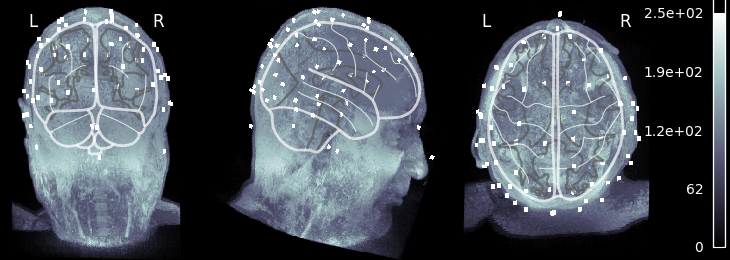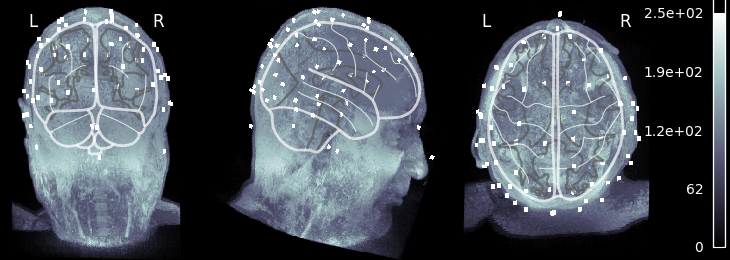
​
# **<span style="color:#e76f51;">Data Context</span>**
​
The data in this Notebook contains EEG Signals of over 80+ Patients each having several Trials Data. 
​
**`../input/button-tone-sz` , `../input/buttontonesz2`** - Folders containing the training Signals
​
 
Humans (and many other animals) have the ability to reduce or suppress their brains' responses to sensory consequences that are a result of their own actions. The nervous system accomplishes this with a corollary discharge forward model system in which an "efference copy" of an impending motor plan is transmitted from motor to sensory cortex where it generates a "corollary discharge" representation of the expected sensory consequences of the imminent motor act. For example, when you move your eyes from left to right, your brain knows the environment is not shifting. When you speak, your auditory cortex has a reduced response to the expected sound of your voice.

Schizophrenia is a chronic mental illness that affects about 1% of people across the globe. One possible explanation for some of the symptoms of schizophrenia is that one or more problems with the corollary discharge process in the nervous system makes it difficult for patients to differentiate between internally and externally generated stimuli. Therefore, studying this process and its relationship to symptoms in the illness might allow us to better understand abnormal brain processes in patients with this diagnosis.

**In a previously published EEG experiment (full report), They used a simple button pressing task in which subjects either (1) pressed a button to immediately generated a tone, (2) passively listened to the same tone, or (3) pressed a button without generating a tone to study the corollary discharge in people with schizophrenia and comparison controls. We found that comparison controls suppressed the N100, a negative deflection in EEG brain wave 100 milliseconds after the onset of a sound, when they pressed a button to generate a tone compared to passive playback, but patients with schizophrenia did not. This data set is a larger sample replication of that previous study. Specifically, EEG data from 22 controls and 36 patients with schizophrenia have been combined with 10 controls and 13 patients from their previous report.**

<img src="https://camo.githubusercontent.com/dd842f7b0be57140e68b2ab9cb007992acd131c48284eaf6b1aca758bfea358b/68747470733a2f2f692e696d6775722e636f6d2f52557469567a482e706e67">

> I will be integrating W&B for visualizations and logging artifacts and comparisons of different models!
> 
> [W&B Training of EEG Schizophrenia Disorder using CNN🧠](https://wandb.ai/owaiskhan9515/Training%20of%20EEG%20Schizophrenia%20Disorder%20using%20CNN)

In [1]:
import wandb
from wandb.keras import WandbCallback
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
wandb_api_key = user_secrets.get_secret("wandb_api")
wandb.login(key=wandb_api_key)
    
wandb.init(project="Training of EEG Schizophrenia Disorder using CNN",name=f"15. Training-of-EEG-Schizophrenia-Disorder-Run-15")

wandb: W&B API key is configured (use `wandb login --relogin` to force relogin)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: owaiskhan9515 (use `wandb login --relogin` to force relogin)


# **<span style="color:#e76f51;">Basic Lib Imports</span>**

In [2]:
import os
import time
import numpy as np
import pandas as pd

import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
     
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
! for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done

tee: '/sys/bus/pci/devices/0000:00:00.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:01.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:01.3/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:03.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:04.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:05.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:06.0/numa_node': Read-only file system
0
tee: '/sys/bus/pci/devices/0000:00:07.0/numa_node': Read-only file system
0


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/buttontonesz2/42.csv/42.csv
/kaggle/input/buttontonesz2/55.csv/55.csv
/kaggle/input/buttontonesz2/33.csv/33.csv
/kaggle/input/buttontonesz2/59.csv/59.csv
/kaggle/input/buttontonesz2/56.csv/56.csv
/kaggle/input/buttontonesz2/30.csv/30.csv
/kaggle/input/buttontonesz2/36.csv/36.csv
/kaggle/input/buttontonesz2/51.csv/51.csv
/kaggle/input/buttontonesz2/38.csv/38.csv
/kaggle/input/buttontonesz2/31.csv/31.csv
/kaggle/input/buttontonesz2/35.csv/35.csv
/kaggle/input/buttontonesz2/41.csv/41.csv
/kaggle/input/buttontonesz2/45.csv/45.csv
/kaggle/input/buttontonesz2/26.csv/26.csv
/kaggle/input/buttontonesz2/28.csv/28.csv
/kaggle/input/buttontonesz2/43.csv/43.csv
/kaggle/input/buttontonesz2/52.csv/52.csv
/kaggle/input/buttontonesz2/57.csv/57.csv
/kaggle/input/buttontonesz2/40.csv/40.csv
/kaggle/input/buttontonesz2/65.csv/65.csv
/kaggle/input/buttontonesz2/44.csv/44.csv
/kaggle/input/buttontonesz2/58.csv/58.csv
/kaggle/input/buttontonesz2/61.csv/61.csv
/kaggle/input/buttontonesz2/50.csv

In [4]:
demographic = pd.read_csv("/kaggle/input/button-tone-sz/demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [5]:
demographic[" group"].value_counts()

1    49
0    32
Name:  group, dtype: int64

In [6]:
demographic[" group"].mean()

0.6049382716049383

In [7]:
for i, t in enumerate(list(demographic[" group"])):
    if t:
        print(f"{i} - Schizophrenia")
    else:
        print(f"{i} - HEALTHY")

0 - HEALTHY
1 - HEALTHY
2 - HEALTHY
3 - HEALTHY
4 - HEALTHY
5 - HEALTHY
6 - HEALTHY
7 - HEALTHY
8 - HEALTHY
9 - HEALTHY
10 - HEALTHY
11 - HEALTHY
12 - HEALTHY
13 - HEALTHY
14 - HEALTHY
15 - HEALTHY
16 - HEALTHY
17 - HEALTHY
18 - HEALTHY
19 - HEALTHY
20 - HEALTHY
21 - HEALTHY
22 - HEALTHY
23 - HEALTHY
24 - Schizophrenia
25 - Schizophrenia
26 - Schizophrenia
27 - Schizophrenia
28 - Schizophrenia
29 - Schizophrenia
30 - Schizophrenia
31 - Schizophrenia
32 - Schizophrenia
33 - Schizophrenia
34 - Schizophrenia
35 - Schizophrenia
36 - Schizophrenia
37 - Schizophrenia
38 - Schizophrenia
39 - Schizophrenia
40 - Schizophrenia
41 - Schizophrenia
42 - Schizophrenia
43 - Schizophrenia
44 - Schizophrenia
45 - Schizophrenia
46 - Schizophrenia
47 - Schizophrenia
48 - Schizophrenia
49 - Schizophrenia
50 - Schizophrenia
51 - Schizophrenia
52 - Schizophrenia
53 - Schizophrenia
54 - Schizophrenia
55 - Schizophrenia
56 - Schizophrenia
57 - Schizophrenia
58 - HEALTHY
59 - HEALTHY
60 - HEALTHY
61 - HEALTHY


In [8]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
del demographic #deeting demographic Variable

In [9]:
electrodes_list = list(pd.read_csv("/kaggle/input/button-tone-sz/columnLabels.csv").columns[4:])
print("Electrodes List \n",electrodes_list)

Electrodes List 
 ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10']


# **<span style="color:#e76f51;">Data PreProcessing</span>**

In [10]:
def averaged_by_N_rows(a, n):
    """ 
    A function that averages n rows in a matrix
    """
    shape = a.shape
    assert len(shape) == 2
    assert shape[0] % n == 0
    b = a.reshape(shape[0] // n, n, 
                  shape[1])
    mean_vec = b.mean(axis=1)
    return mean_vec
    

In [11]:
N_AVERAGED = 16
x_counter = 0
X = np.zeros((81 * 100,  9216 * len(electrodes_list) // N_AVERAGED), dtype="float32")
Y = np.zeros(len(X))

part1_path = "../input/button-tone-sz"
part2_path = "../input/buttontonesz2"


column_list = pd.read_csv("/kaggle/input/button-tone-sz/columnLabels.csv").columns
for person_number in tqdm(range(1, 81 + 1)):


    csv_path = f"{part1_path}/{person_number}.csv/{person_number}.csv"
    if not os.path.exists(csv_path):
        csv_path = f"{part2_path}/{person_number}.csv/{person_number}.csv"
    df = pd.read_csv(csv_path, 
                header=None,
                names=column_list)
    trials_list = set(df.trial)


    for t1, trial_number in enumerate(trials_list):
        number_of_trials = len(df[df.trial == trial_number])
        if number_of_trials == 9216.0:
            current_sample_matrix = df[df.trial == trial_number][electrodes_list].values
            averaged_by_N = averaged_by_N_rows(current_sample_matrix, n=N_AVERAGED)
            averaged_by_N_big_vec = averaged_by_N.reshape(-1)
            X[x_counter] = averaged_by_N_big_vec.astype(np.float32)
            Y[x_counter] = diagnosis_dict[person_number]
            x_counter += 1
print("Total trials with the Appropriate number of measurements - ", x_counter)
X = X[: x_counter]
Y = Y[: x_counter]
        
print("Total trials with the Appropriate number of measurements- ", x_counter)

  0%|          | 0/81 [00:00<?, ?it/s]

Total trials with the Appropriate number of measurements -  7092
Total trials with the Appropriate number of measurements-  7092


In [12]:
X.shape

(7092, 40320)

In [13]:
Y.shape

(7092,)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [15]:
X_norm = (normalize(X.reshape(-1, 70), axis=0, norm='max')).reshape(X.shape)

In [16]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, Y, test_size=0.2, shuffle=True, random_state=42)

In [17]:
_norm = X

In [18]:
X_train_2d = X_train_norm.reshape(X_train_norm.shape[0], len(electrodes_list), X_train_norm.shape[1] // len(electrodes_list), 1)
X_test_2d = X_test_norm.reshape(X_test_norm.shape[0], len(electrodes_list), X_test_norm.shape[1] // len(electrodes_list), 1)

In [19]:
filepath="/kaggle/working/best_model1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 20),
                 activation='tanh',
                 input_shape=(X_train_2d.shape[1:])))
model.add(MaxPooling2D(pool_size=(5, 15)))

model.add(Conv2D(13, kernel_size=(3, 3),
                 activation='tanh',))
model.add(MaxPooling2D(pool_size=(3, 3)))
          

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(317, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.optimizers.Adam(0.0000075),
              metrics=['acc'])

In [21]:
history_params = []

# **<span style="color:#e76f51;">Training Starts (Check 1)</span>**

In [22]:
history = model.fit(X_train_2d, Y_train_norm,
          batch_size=256,
          epochs=400,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_2d, Y_test_norm), callbacks=[checkpoint,WandbCallback(validation_data=(X_test_2d, Y_test_norm))])

Epoch 1/400
23/23 [==============================] - 16s 235ms/step - loss: 0.6960 - acc: 0.4141 - val_loss: 0.6946 - val_acc: 0.4144

Epoch 00001: val_acc improved from -inf to 0.41438, saving model to /kaggle/working/best_model1.h5
Epoch 2/400
23/23 [==============================] - 4s 182ms/step - loss: 0.6939 - acc: 0.4717 - val_loss: 0.6928 - val_acc: 0.5539

Epoch 00002: val_acc improved from 0.41438 to 0.55391, saving model to /kaggle/working/best_model1.h5
Epoch 3/400
23/23 [==============================] - 4s 182ms/step - loss: 0.6922 - acc: 0.5484 - val_loss: 0.6910 - val_acc: 0.5899

Epoch 00003: val_acc improved from 0.55391 to 0.58985, saving model to /kaggle/working/best_model1.h5
Epoch 4/400
23/23 [==============================] - 4s 181ms/step - loss: 0.6901 - acc: 0.5912 - val_loss: 0.6892 - val_acc: 0.5927

Epoch 00004: val_acc improved from 0.58985 to 0.59267, saving model to /kaggle/working/best_model1.h5
Epoch 5/400
23/23 [==============================] - 4s 18

In [23]:
wandb.finish()

acc,▁▂▂▂▂▂▂▂▂▂▂▂▃▃▃▄▃▄▄▅▅▅▅▅▅▅▆▆▇▆▇▇▇▇▇▇████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▂▃▃▃▄▅▆▆▇▇▇▇█▇▇███▇█▇██▇▇██
val_loss,█▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
acc,0.64446
best_epoch,399
best_val_loss,0.6477
epoch,399
loss,0.62596
val_acc,0.63495


## <span style="color:#e76f51;">Summarizing History For Accuracy For Convolutional Neural Networks</span>

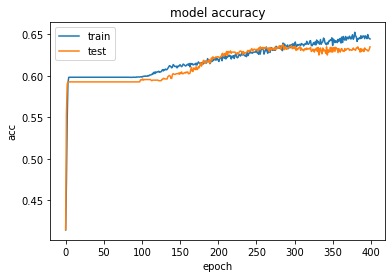

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <span style="color:#e76f51;">Summarizing history for loss  For Convolutional Neural Networks</span></span>

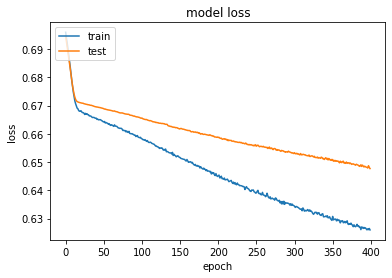

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
accuracy, loss = model.evaluate(X_test_2d, Y_test_norm)
print(f"Val accuracy={accuracy}  val loss={loss}")

45/45 [==============================] - 1s 11ms/step - loss: 0.6477 - acc: 0.6350
Val accuracy=0.6476961970329285  val loss=0.6349542140960693


In [27]:
y_predicted =  model.predict(X_test_2d)

confusion_matr = confusion_matrix(Y_test_norm, np.round(model.predict(X_test_2d)))
confusion_matr

array([[184, 394],
       [124, 717]])

In [28]:
print(
    "True Positive for schizophrenia ", confusion_matr[0, 0], "\n",
    "False Positive for schizophrenia ", confusion_matr[0, 1], "\n",
    "False Neagtive For Healthy ", confusion_matr[1, 0], "\n",
    "True Neagtive For Healthy ", confusion_matr[1, 1], "\n")

True Positive for schizophrenia  184 
 False Positive for schizophrenia  394 
 False Neagtive For Healthy  124 
 True Neagtive For Healthy  717 



In [29]:
TP = confusion_matr[0, 0]
FP = confusion_matr[0, 1]
FN = confusion_matr[1, 0]
TN = confusion_matr[1, 1]
TP, FP, FN, TN

(184, 394, 124, 717)

### <span style="color:#e76f51;">Sensitivity for the first network</span>

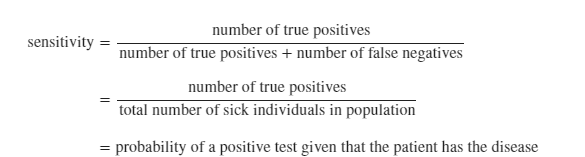

In [30]:
sensitivity = TP / (TP + FN)
sensitivity

0.5974025974025974

### <span style="color:#e76f51;">Specificity for the first network</span>

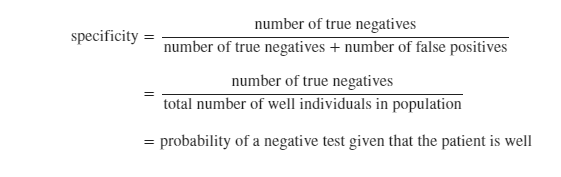

In [31]:
specificity = TN / (TN + FP)
specificity

0.6453645364536453

### <span style="color:#e76f51;">Fully Connected Neural Network (Check 2 with tweeked parameters)</span>

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [33]:
filepath="/kaggle/working/best_model2.h5" # Checkpoints
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Simple Neural Networks with 5000 Neurons
model_2 = Sequential()




model_2.add(Conv2D(32, kernel_size=(5, 20),
                 activation='tanh',
                 input_shape=(X_train_2d.shape[1:])))
model_2.add(MaxPooling2D(pool_size=(5, 15)))

model_2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='tanh',))
model_2.add(MaxPooling2D(pool_size=(3, 3)))
          

model_2.add(Dropout(0.15))
model_2.add(Flatten())

model_2.add(Dense(512, activation='relu'))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.optimizers.Adam(0.000005),
              metrics=['acc'])

In [34]:
history_2 = model.fit(X_train_2d, Y_train_norm,
          batch_size=256,
          epochs=300,
          verbose=1,
          shuffle=True,
          validation_data=(X_test_2d, Y_test_norm), callbacks=[checkpoint])

Epoch 1/300
23/23 [==============================] - 5s 216ms/step - loss: 0.6254 - acc: 0.6469 - val_loss: 0.6477 - val_acc: 0.6314

Epoch 00001: val_acc improved from -inf to 0.63143, saving model to /kaggle/working/best_model2.h5
Epoch 2/300
23/23 [==============================] - 5s 198ms/step - loss: 0.6248 - acc: 0.6519 - val_loss: 0.6477 - val_acc: 0.6328

Epoch 00002: val_acc improved from 0.63143 to 0.63284, saving model to /kaggle/working/best_model2.h5
Epoch 3/300
23/23 [==============================] - 5s 200ms/step - loss: 0.6258 - acc: 0.6496 - val_loss: 0.6477 - val_acc: 0.6342

Epoch 00003: val_acc improved from 0.63284 to 0.63425, saving model to /kaggle/working/best_model2.h5
Epoch 4/300
23/23 [==============================] - 5s 201ms/step - loss: 0.6263 - acc: 0.6482 - val_loss: 0.6481 - val_acc: 0.6321

Epoch 00004: val_acc did not improve from 0.63425
Epoch 5/300
23/23 [==============================] - 5s 205ms/step - loss: 0.6253 - acc: 0.6485 - val_loss: 0.6

In [35]:
loss, accuracy = model_2.evaluate(X_test_2d, Y_test_norm)
loss, accuracy 

45/45 [==============================] - 1s 12ms/step - loss: 0.6924 - acc: 0.5891


(0.6923742890357971, 0.5891472697257996)

## <span style="color:#e76f51;">Summarizing History For Accuracy And Loss For Second Network</span>

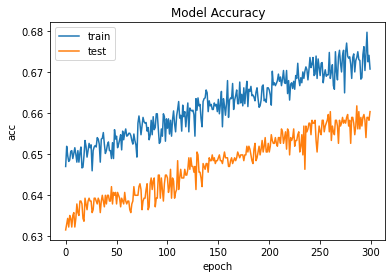

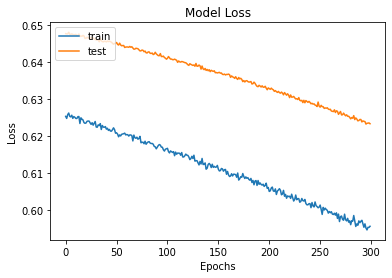

In [36]:
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## <span style="color:#e76f51;">Confusion matrix</span>

In [37]:
y_predicted =  model_2.predict(X_test_2d)

confusion_matr = confusion_matrix(Y_test_norm, np.round(model_2.predict(X_test_2d)))
confusion_matr

array([[ 83, 495],
       [ 88, 753]])

In [38]:
print(
 "True Positive for schizophrenia ", confusion_matr[0, 0], "\n",
 "False Positive for schizophrenia ", confusion_matr[0, 1], "\n",
 "False Neagtive For Healthy ", confusion_matr[1, 0], "\n",
 "True Neagtive For Healthy ", confusion_matr[1, 1], "\n"    
)

True Positive for schizophrenia  83 
 False Positive for schizophrenia  495 
 False Neagtive For Healthy  88 
 True Neagtive For Healthy  753 



In [39]:
TP = confusion_matr[0, 0]
FP = confusion_matr[0, 1]
FN = confusion_matr[1, 0]
TN = confusion_matr[1, 1]
TP, FP, FN, TN

(83, 495, 88, 753)

### <span style="color:#e76f51;">Sensitivity for the Second network</span>

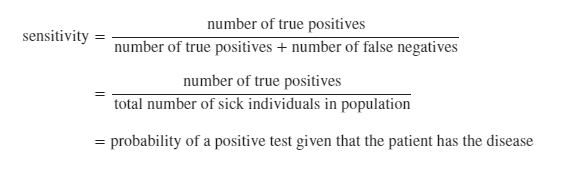

In [40]:
sensitivity = TP / (TP + FN)
print(sensitivity)

0.4853801169590643


### <span style="color:#e76f51;">Specificity for the Second network</span>

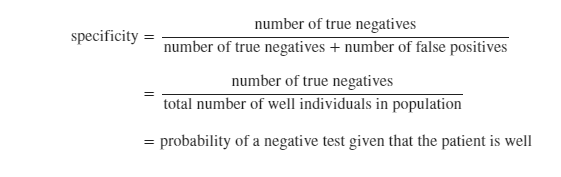

In [41]:
specificity = TN / (TN + FP)
print(specificity)

0.6033653846153846


### **<span style="color:#e76f51;">Acknowledgements</span>**

- [EEG data from basic sensory task in Schizophrenia](https://www.kaggle.com/datasets/broach/button-tone-sz)

- [Did I Do That? Abnormal Predictive Processes in Schizophrenia When Button Pressing to Deliver a Tone](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4059422/)

- https://www.kaggle.com/broach/buttontonesz2

### **<span style="color:#e76f51;">Attributions</span>**

- [FASTER: Fully Automated Statistical Thresholding for EEG artifact Rejection](https://pubmed.ncbi.nlm.nih.gov/20654646/)

- [A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

- [An Introduction to Convolutional Neural Networks](https://arxiv.org/abs/1511.08458)

- [Recent Advances in Convolutional Neural Networks](https://arxiv.org/abs/1512.07108)

- [CodeBasics YouTube](https://www.youtube.com/watch?v=zfiSAzpy9NM)


## Work in progress 🚧

# Do Comments For Question and Queries